In [1]:
f = open('c:/data/text/warandpeace.txt', encoding='utf-8')
lines = f.readlines()
f.close()
print(lines[1][:500])

The Project Gutenberg eBook of War and Peace, by Leo Tolstoy



In [2]:
#숫자, 특수문자 제거
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('[\w]+')

In [3]:
#불용어 사전
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [4]:
#모든 단어를 소문자로 변환
words = ''
for line in lines:
    words += line.lower()

In [5]:
#단어 단위로 토큰화
tokens = tokenizer.tokenize(words)

In [6]:
#불용어 제거
stopped_tokens = [i for i in list(tokens) if not i in stop_words]

In [7]:
#글자수가 1인 단어들 제거
stopped_tokens2 = [i for i in stopped_tokens if len(i) > 1]

In [8]:
#출현 빈도가 높은 단어들
import pandas as pd
pd.Series(stopped_tokens2).value_counts().head(10)

said       2842
one        2134
pierre     1963
prince     1929
would      1366
natásha    1213
man        1189
andrew     1144
could      1116
time        929
dtype: int64

Counter({'said': 2842, 'one': 2134, 'pierre': 1963, 'prince': 1929, 'would': 1366, 'natásha': 1213, 'man': 1189, 'andrew': 1144, 'could': 1116, 'time': 929, 'princess': 916, 'face': 893, 'french': 881, 'went': 862, 'know': 847, 'old': 835, 'eyes': 827, 'men': 792, 'rostóv': 776, 'room': 771, 'thought': 767, 'go': 755, 'like': 751, 'well': 746, 'see': 734, 'chapter': 732, 'count': 726, 'moscow': 722, 'began': 718, 'come': 684, 'came': 683, 'still': 676, 'without': 675, 'asked': 668, 'mary': 668, 'army': 665, 'looked': 651, 'say': 640, 'first': 633, 'nicholas': 633, 'emperor': 631, 'felt': 631, 'another': 620, 'life': 618, 'away': 617, 'left': 611, 'something': 601, 'two': 595, 'seemed': 583, 'napoleon': 578, 'head': 568, 'day': 567, 'yes': 561, 'people': 560, 'little': 557, 'long': 545, 'hand': 541, 'whole': 532, 'kutúzov': 529, 'back': 520, 'even': 512, 'general': 506, 'heard': 498, 'good': 497, 'way': 494, 'countess': 488, 'must': 482, 'look': 475, 'nothing': 473, 'always': 464, 'saw'

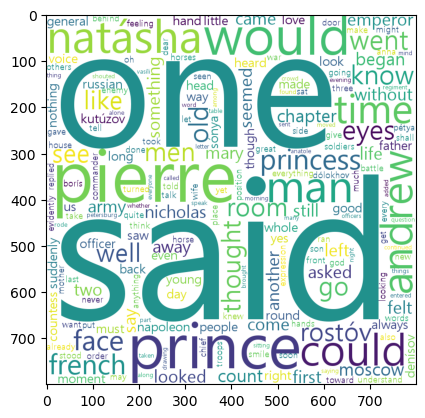

In [9]:
#워드 클라우드
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
# 폰트 경로, 워드클라우드의 가로,세로 사이즈
wordcloud = WordCloud(font_path = 'c:/windows/fonts/malgun.ttf', width = 800, 
                      height = 800, background_color="white")
# 단어별 출현횟수 저장
count = Counter(stopped_tokens2)
print(count)
wordcloud = wordcloud.generate_from_frequencies(count)
plt.imshow(wordcloud)
plt.show()

In [12]:
#뉴스 기사를 하나 찾아서 news1.txt로 저장
f = open("c:/data/text/news1.txt", encoding='utf-8')
lines = f.readlines()
f.close()

In [14]:
#한나눔 형태소 분석기
from konlpy.tag import Hannanum
han = Hannanum()
temp = []
for i in range(len(lines)):
    #명사만 추출
    a = lines[i].strip()
    temp.append(han.nouns(a))

In [15]:
#2차원 리스트를 1차원 리스트로 변환하는 함수
def flatten(items):
    flatList = []
    for elem in items:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList
word_list = flatten(temp)

In [16]:
#두글자 이상인 단어만 추출
word_list = pd.Series([x for x in word_list if len(x)>1])

In [17]:
#단어별 출현 빈도
word_list.value_counts().head(10)

교수        9
수능        7
통합        6
대입        5
정시        4
수시        4
교사        3
대입제도      3
고3        3
국가교육회의    3
dtype: int64

In [18]:
#불용어 처리
stopwords = ['통합']
word_list2 = [i for i in word_list if i not in stopwords]

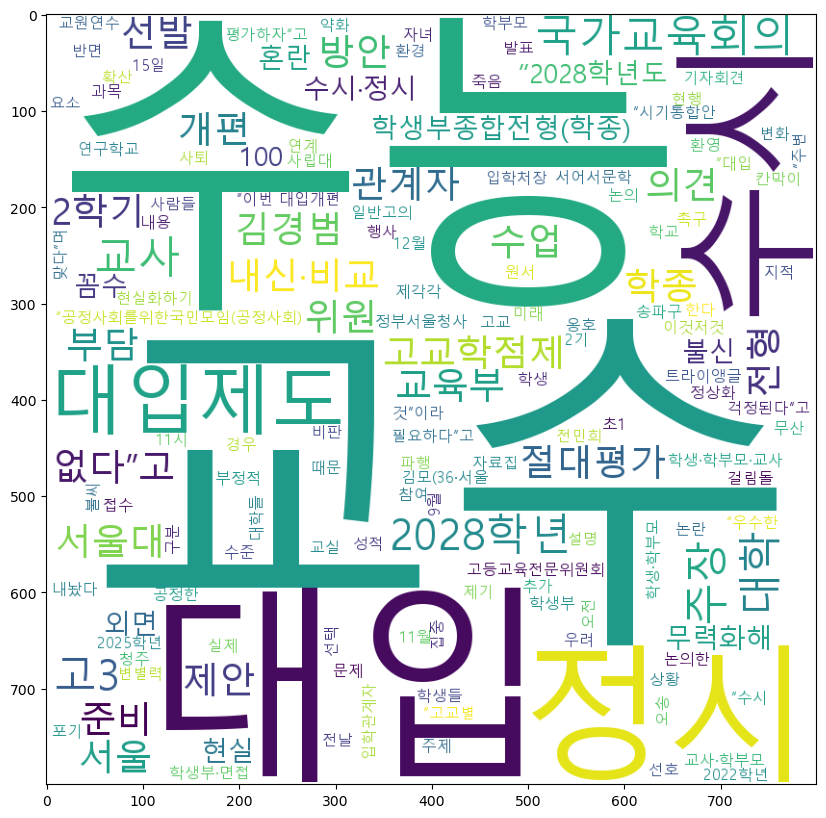

In [19]:
# 한글 뉴스를 워드클라우드로 출력
wordcloud = WordCloud( font_path='c:/windows/fonts/malgun.ttf', width=800,
                      height=800, background_color='white')
count = Counter(word_list2)
wordcloud = wordcloud.generate_from_frequencies(count)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.show()